# DATA DESCRIPTION

The data can be found at https://ssh.datastations.nl/dataverse/root. For data to become available, registration to the website
is required, while access to the datasets must be requested by the Data station of Social Sciences and Humanities for free.
Data were collected for years 2018 - 2022. 
The dataset is a trip diary survey where people within Netherlands record their trips and answer demographic questions. The survey is called
ODIN and is conducted by the Central Bureau of Statistics in Netherlands annualy. 
Features within the dataset are decribed in Dutch so it was required to translate them using Google and following the Codebook Guideline
also available at the same link as above.
The original datasets for each year, as downloaded from the website, contain about 150000-200000 trips/rows and about 100 columns.
From these datasets, trip related features were selected such as distance and duration of the trip and some demographic features such as 
household size and number of vehicles in the house. After the features were extracted for each years, the data were merged and the resulting dataset
can be seen below

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from itertools import cycle
import warnings
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.utils import shuffle
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [2]:
zip_file_path = 'Netherlands_data_prototype_f.zip'
csv_file_inside_zip = 'Netherlands_data_prototype.csv'

In [3]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [4]:
warnings.filterwarnings("ignore")

In [5]:
df

,HHPers,Geslacht,Leeftijd,Herkomst,Opleiding,OPRijbewijsAu,HHAuto,HMopeds,HHEFiets,Jaar,Maand,Weekdag,Feestdag,Toer,KMotiefV,AfstR,RReisduur,RVertUur,KRvm
0,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,4,60,15,10,1
1,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,4,60,10,11,1
2,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,6,10,5,15,4
3,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,6,10,5,18,4
4,2,1,42,1,3,1,1,0,0,2018,1,6,0,0,4,30,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,5,110,35,15,1
817122,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,4,11,7,16,6
817123,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,4,6,5,17,6
817124,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,7,63,15,18,1


In [13]:
df = df.drop("Jaar", axis=1)
df

,HHPers,Geslacht,Leeftijd,Herkomst,Opleiding,OPRijbewijsAu,HHAuto,HMopeds,HHEFiets,Maand,Weekdag,Feestdag,Toer,KMotiefV,AfstR,RReisduur,RVertUur,KRvm
0,1,1,42,1,3,1,1,0,0,1,7,0,0,4,60,15,10,1
1,1,1,42,1,3,1,1,0,0,1,7,0,0,4,60,10,11,1
2,1,1,42,1,3,1,1,0,0,1,7,0,0,6,10,5,15,4
3,1,1,42,1,3,1,1,0,0,1,7,0,0,6,10,5,18,4
4,2,1,42,1,3,1,1,0,0,1,6,0,0,4,30,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,2,49,3,4,1,1,0,0,12,5,0,0,5,110,35,15,1
817122,3,2,49,3,4,1,1,0,0,12,5,0,0,4,11,7,16,6
817123,3,2,49,3,4,1,1,0,0,12,5,0,0,4,6,5,17,6
817124,3,2,49,3,4,1,1,0,0,12,5,0,0,7,63,15,18,1


In [14]:
print(df.columns)

Index(['HHPers', 'Geslacht', 'Leeftijd', 'Herkomst', 'Opleiding',
       'OPRijbewijsAu', 'HHAuto', 'HMopeds', 'HHEFiets', 'Maand', 'Weekdag',
       'Feestdag', 'Toer', 'KMotiefV', 'AfstR', 'RReisduur', 'RVertUur',
       'KRvm'],
      dtype='object')


In [15]:
new_columns= {"HHPers": "People_in_house", "Geslacht": "Gender", "Leeftijd": "Age",
              "Herkomst": "Background", "Opleiding": "Education", "OPRijbewijsAu": "Driver_license", "HHAuto": "Cars_in_house",
              "HMopeds": "Mopeds_in_house", "HHEFiets": "Electric_bike", "Maand": "Month", "Weekdag": "Weekday",
               "Feestdag": "Holiday","Toer": "Round_trip", "KMotiefV": "Motive", 
              "AfstR": "Distance", "RReisduur": "Duration", 'RVertUur':'Hour', "KRvm": "Mode"}

In [16]:
df.rename(columns=new_columns, inplace=True)
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Distance,Duration,Hour,Mode
0,1,1,42,1,3,1,1,0,0,1,7,0,0,4,60,15,10,1
1,1,1,42,1,3,1,1,0,0,1,7,0,0,4,60,10,11,1
2,1,1,42,1,3,1,1,0,0,1,7,0,0,6,10,5,15,4
3,1,1,42,1,3,1,1,0,0,1,7,0,0,6,10,5,18,4
4,2,1,42,1,3,1,1,0,0,1,6,0,0,4,30,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,2,49,3,4,1,1,0,0,12,5,0,0,5,110,35,15,1
817122,3,2,49,3,4,1,1,0,0,12,5,0,0,4,11,7,16,6
817123,3,2,49,3,4,1,1,0,0,12,5,0,0,4,6,5,17,6
817124,3,2,49,3,4,1,1,0,0,12,5,0,0,7,63,15,18,1


# Variables

1) People_in_house - How many members the household has - Numeric - Discrete - Integer
2) Gender - Male / Female - Categorical - Binary
3) Age - Age of the respondent in years - Numeric - Continuous - Integer
4) Background - The citizenship of the respondent (Dutch or other) - Categorical - Nominal
5) Education - Highest education completed for the respondent - Categorical - Nominal
6) Drivel_License - If the respondent has car driving license - Categorical - Binary
7) Cars_in_house - How many vehicles the household has - Numeric - Discrete - integer
8) Mopeds_in_house - How many mopeds(type of motorcycle) the household has - Numeric - Discrete - Integer
9) Electric_bike - If the respondent has access to an electric bike - Categorical - binary
10) Year - Year that the trip occured - Numeric - Integer
11) Month - Month that the trip occured - Categorical
12) Weekday - Day that the trip occured - Categorical
13) Holiday - If the trip occured on a national holiday - Categorical - Binary
14) Round_trip - If the respondent made a round trip (Begin and finish the trip at the same location) - Categorical - Binary
15) Motive - The reason of the trip - Categorial - Nominal
16) DIstance - The distance (In hectometers) of the trip - Numeric - Continuous
17) Duration - The duration (In minutes) of the trip - Numeric - Continuous
18) Hour - Hour of departure
19) Mode - The mode of transportation for the trip - Categorical - Target variable

In [17]:
df.isnull().any()

People_in_house    False
Gender             False
Age                False
Background         False
Education          False
Driver_license     False
Cars_in_house      False
Mopeds_in_house    False
Electric_bike      False
Month              False
Weekday            False
Holiday            False
Round_trip         False
Motive             False
Distance           False
Duration           False
Hour               False
Mode               False
dtype: bool

In [18]:
df.duplicated().sum()

37399

In [19]:
df = df.drop_duplicates()

# Encode variables to categorial so to perform Explanatory Data Analysis
We will use the codebook available at: https://ssh.datastations.nl/dataset.xhtml?persistentId=doi:10.17026/dans-zwz-fq8t

In [20]:
df['Gender'].value_counts()

Gender
2    403399
1    376328
Name: count, dtype: int64

In [21]:
df['Gender'] = df['Gender'].map({1:"Male", 2:"Female"})

In [22]:
df['Background'].value_counts()

Background
1    621378
3     82953
2     75396
Name: count, dtype: int64

In [23]:
df['Background'] = df['Background'].map({1:"Dutch", 2:"Non Dutch", 3:"Non Dutch"})

In [24]:
df['Background'].value_counts()

Background
Dutch        621378
Non Dutch    158349
Name: count, dtype: int64

In [25]:
df['Education'].value_counts()

Education
4    323522
3    224823
2     98232
7     85831
1     24511
5     15919
0      6889
Name: count, dtype: int64

In [26]:
df['Education'] = df['Education'].map({0:"No education", 1:"Primary education", 2:"Lower vocational", 3:"Secondary", 4:"Higher education",
                                       5:"Other education", 7:"Currently attending"})

In [27]:
df['Driver_license'].value_counts()

Driver_license
1    582677
0    197050
Name: count, dtype: int64

In [28]:
df['Driver_license'] = df['Driver_license'].map({0:"No", 1:"Yes"})

In [29]:
df['Electric_bike'].value_counts()

Electric_bike
0    550926
1    228801
Name: count, dtype: int64

In [30]:
df['Electric_bike'] = df['Electric_bike'].map({0:"No", 1:"Yes"})

In [31]:
df['Month'].value_counts()

Month
9     72793
11    70544
1     69717
10    69524
5     65495
3     65483
6     64615
8     62905
7     60787
12    60657
2     59257
4     57950
Name: count, dtype: int64

In [32]:
df['Month'] = df['Month'].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July",
                               8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})

In [33]:
df['Weekday'].value_counts()

Weekday
6    123502
5    117719
3    115184
4    114867
2    112304
7    111754
1     84397
Name: count, dtype: int64

In [34]:
df['Weekday'] = df['Weekday'].map({1:"Sunday", 2:"Monday", 3:"Tuesday", 4:"Wednesday", 5:"Thursday", 6:"Friday", 7:"Saturday"})

In [35]:
df['Round_trip'].value_counts()

Round_trip
0    681392
1     98335
Name: count, dtype: int64

In [36]:
df['Round_trip'] = df['Round_trip'].map({0:"No", 1:"Yes"})

In [38]:
df['Motive'].value_counts()

Motive
4    150803
7    141284
1    135299
9     82758
8     80991
6     79876
5     63972
3     25371
2     19373
Name: count, dtype: int64

In [39]:
df['Motive'] = df['Motive'].map({1:"Go to/return from work", 2:"Business related", 3:"Service/Personal care", 4:"Shopping/Grocery",
                                 5:"Education", 6:"Visits", 7:"Social and recreational", 8:"Tours/hiking", 9:"Other motives" })

In [40]:
df['Holiday'].value_counts()

Holiday
0    767022
1     12705
Name: count, dtype: int64

In [41]:
df['Holiday'] = df['Holiday'].map({0: "No", 1: "Yes"})

In [42]:
df['Mode'].value_counts()

Mode
1    338467
4    252591
6    188669
Name: count, dtype: int64

In [43]:
df['Mode'] = df['Mode'].map({1:"car", 4:"sustainable mode", 6:"walk"})

In [44]:
df['Mode'].value_counts()

Mode
car                 338467
sustainable mode    252591
walk                188669
Name: count, dtype: int64

In [45]:
df.shape

(779727, 18)

In [46]:
df.shape

(779727, 18)

In [47]:
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Distance,Duration,Hour,Mode
0,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,60,15,10,car
1,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,60,10,11,car
2,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,10,5,15,sustainable mode
3,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,10,5,18,sustainable mode
4,2,Male,42,Dutch,Secondary,Yes,1,0,No,January,Friday,No,No,Shopping/Grocery,30,10,9,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Education,110,35,15,car
817122,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,11,7,16,walk
817123,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,6,5,17,walk
817124,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Social and recreational,63,15,18,car


# Data Cleaning

In [48]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Distance,Duration,Hour
count,779727.000000,779727.000000,779727.000000,779727.000000,779727.000000,779727.000000,779727.000000
mean,2.853332,42.291170,1.380319,0.207393,97.387094,24.067585,13.629446
std,1.387687,20.755193,1.001696,0.592598,199.610867,31.745771,4.254409
min,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,0.000000,11.000000,10.000000,10.000000
50%,3.000000,42.000000,1.000000,0.000000,30.000000,15.000000,14.000000
75%,4.000000,59.000000,2.000000,0.000000,86.000000,30.000000,17.000000
max,10.000000,99.000000,10.000000,19.000000,6600.000000,993.000000,33.000000


The distance column stores values that are measured in Hectometers. We need to convert those to Kilometers as they are more 
widely used and easier to understand. To convert Hectometers into Kms we need to devide the values with 10

In [49]:
df['Distance_in_kms'] = df['Distance'] / 10

We drop now the Distance column

In [50]:
df = df.drop("Distance", axis=1)

In [51]:
df = df[(df['Hour'] <= 23)]

In [52]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,779378.000000,779378.000000,779378.000000,779378.000000,779378.000000,779378.000000,779378.000000
mean,2.853555,42.296336,1.380482,0.207424,24.071469,13.624696,9.741060
std,1.387647,20.756443,1.001405,0.592647,31.751395,4.249400,19.964588
min,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,0.000000,10.000000,10.000000,1.100000
50%,3.000000,42.000000,1.000000,0.000000,15.000000,14.000000,3.000000
75%,4.000000,59.000000,2.000000,0.000000,30.000000,17.000000,8.600000
max,10.000000,99.000000,10.000000,19.000000,993.000000,23.000000,660.000000


In [53]:
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Duration,Hour,Mode,Distance_in_kms
0,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,15,10,car,6.0
1,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,10,11,car,6.0
2,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,5,15,sustainable mode,1.0
3,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,5,18,sustainable mode,1.0
4,2,Male,42,Dutch,Secondary,Yes,1,0,No,January,Friday,No,No,Shopping/Grocery,10,9,car,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Education,35,15,car,11.0
817122,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,7,16,walk,1.1
817123,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,5,17,walk,0.6
817124,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Social and recreational,15,18,car,6.3


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779378 entries, 0 to 817125
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   People_in_house  779378 non-null  int64  
 1   Gender           779378 non-null  object 
 2   Age              779378 non-null  int64  
 3   Background       779378 non-null  object 
 4   Education        779378 non-null  object 
 5   Driver_license   779378 non-null  object 
 6   Cars_in_house    779378 non-null  int64  
 7   Mopeds_in_house  779378 non-null  int64  
 8   Electric_bike    779378 non-null  object 
 9   Month            779378 non-null  object 
 10  Weekday          779378 non-null  object 
 11  Holiday          779378 non-null  object 
 12  Round_trip       779378 non-null  object 
 13  Motive           779378 non-null  object 
 14  Duration         779378 non-null  int64  
 15  Hour             779378 non-null  int64  
 16  Mode             779378 non-null  object 
 

In [55]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,779378.000000,779378.000000,779378.000000,779378.000000,779378.000000,779378.000000,779378.000000
mean,2.853555,42.296336,1.380482,0.207424,24.071469,13.624696,9.741060
std,1.387647,20.756443,1.001405,0.592647,31.751395,4.249400,19.964588
min,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,0.000000,10.000000,10.000000,1.100000
50%,3.000000,42.000000,1.000000,0.000000,15.000000,14.000000,3.000000
75%,4.000000,59.000000,2.000000,0.000000,30.000000,17.000000,8.600000
max,10.000000,99.000000,10.000000,19.000000,993.000000,23.000000,660.000000


We will also remove samples where Distance and Duration are 0

In [56]:
df = df[(df['Distance_in_kms'] > 0)]

In [57]:
df = df[(df['Duration'] > 0)]

In [58]:
df.shape

(779145, 18)

In [59]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,779145.000000,779145.000000,779145.000000,779145.000000,779145.000000,779145.000000,779145.000000
mean,2.853684,42.297269,1.380512,0.207444,24.078667,13.624986,9.743973
std,1.387669,20.757535,1.001288,0.592687,31.753413,4.249357,19.966862
min,1.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,25.000000,1.000000,0.000000,10.000000,10.000000,1.100000
50%,3.000000,42.000000,1.000000,0.000000,15.000000,14.000000,3.000000
75%,4.000000,59.000000,2.000000,0.000000,30.000000,17.000000,8.600000
max,10.000000,99.000000,10.000000,19.000000,993.000000,23.000000,660.000000


In [60]:
df = df[(df['Age'] >= 18)]
df.shape

(665984, 18)

In [61]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,665984.000000,665984.000000,665984.000000,665984.000000,665984.000000,665984.000000,665984.000000
mean,2.619806,47.520257,1.348854,0.205524,24.702392,13.631303,10.466426
std,1.293814,17.730080,0.986828,0.592390,32.243606,4.297584,20.795330
min,1.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,32.000000,1.000000,0.000000,10.000000,10.000000,1.200000
50%,2.000000,47.000000,1.000000,0.000000,15.000000,14.000000,3.300000
75%,4.000000,61.000000,2.000000,0.000000,30.000000,17.000000,10.000000
max,10.000000,99.000000,10.000000,19.000000,960.000000,23.000000,660.000000


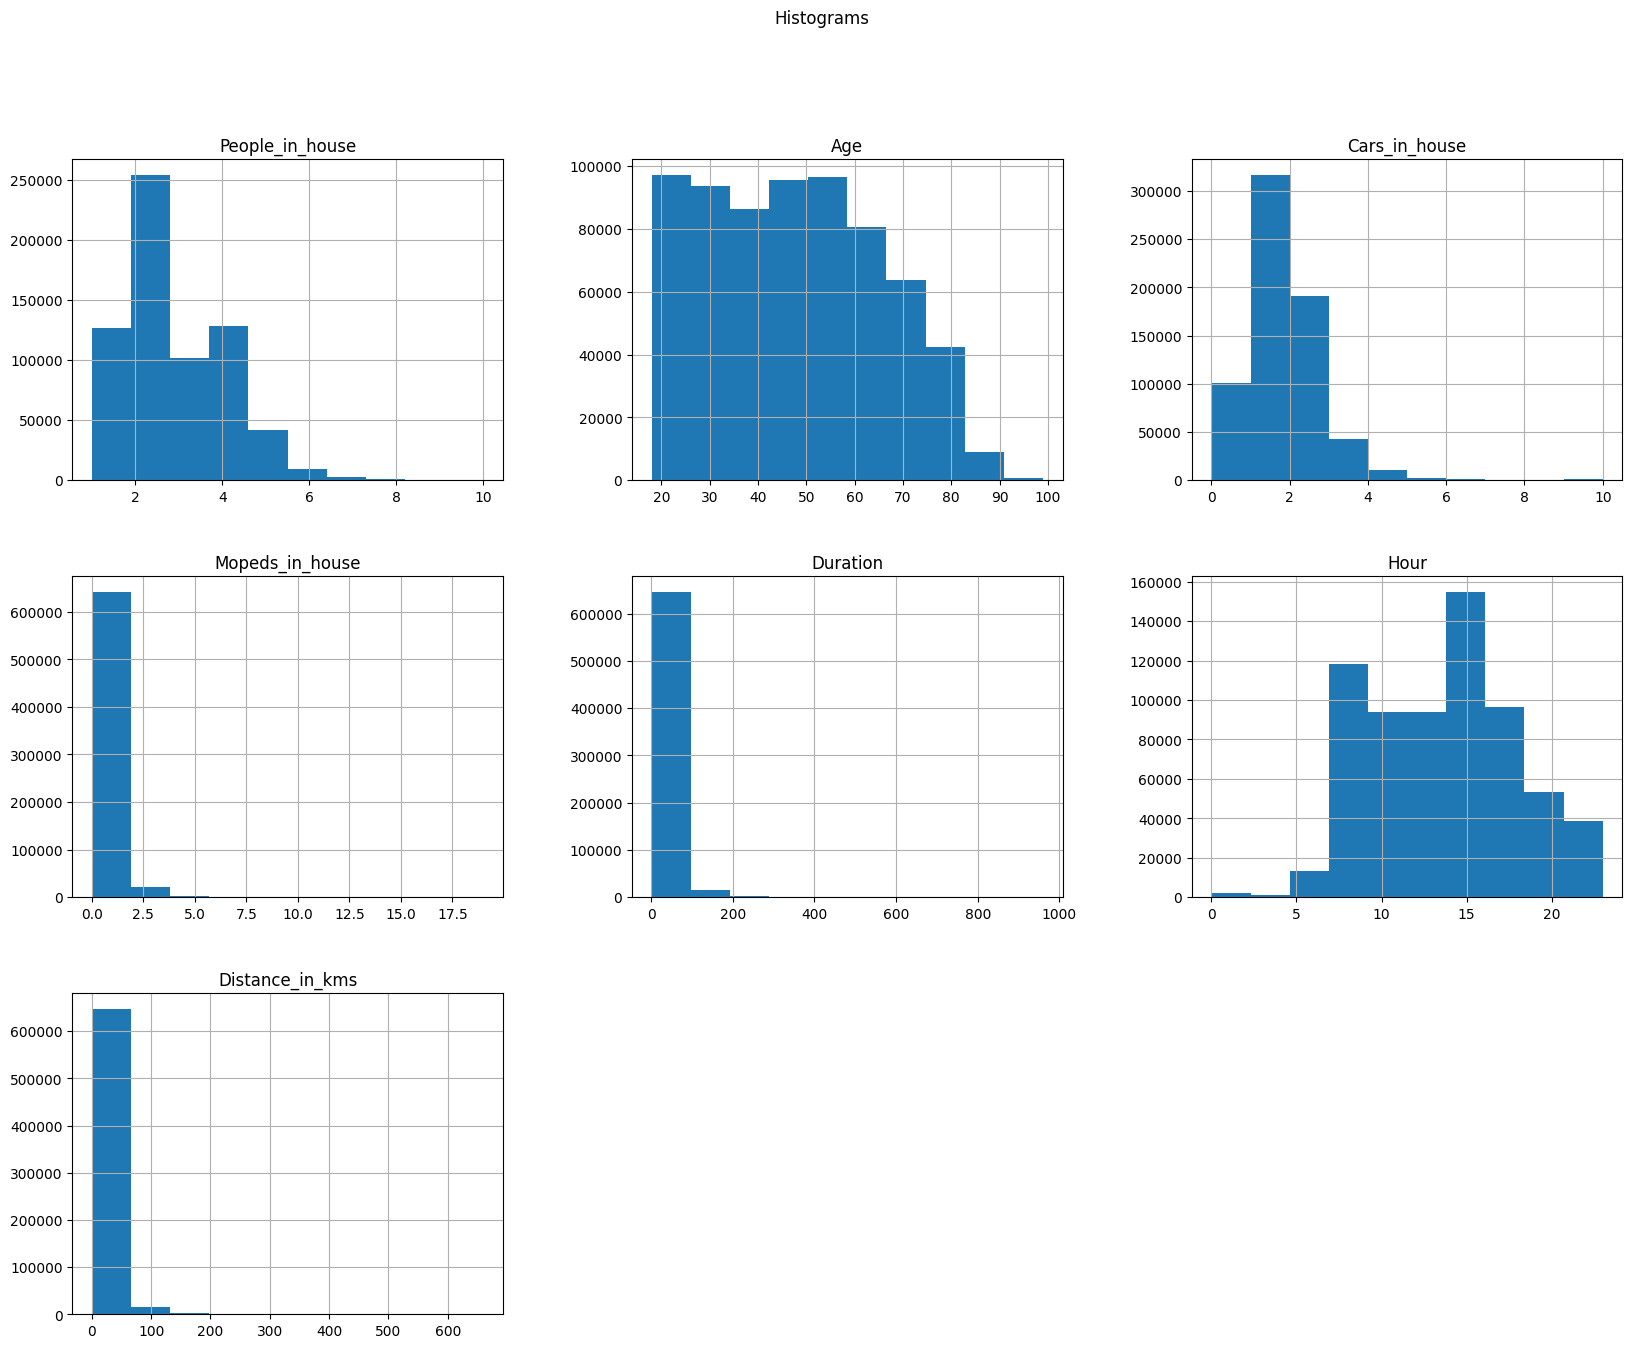

In [62]:
df.hist(bins=10, figsize=(20, 15))
plt.suptitle('Histograms') 
plt.show()

We see that there are outliers in Mopeds, Distance and Duration. We will drop those samples

In [63]:
df = df[(df['Duration'] <= 250)]

In [64]:
df = df[(df['Distance_in_kms'] <= 200)]

In [65]:
df = df[(df['Mopeds_in_house'] <= 6)]

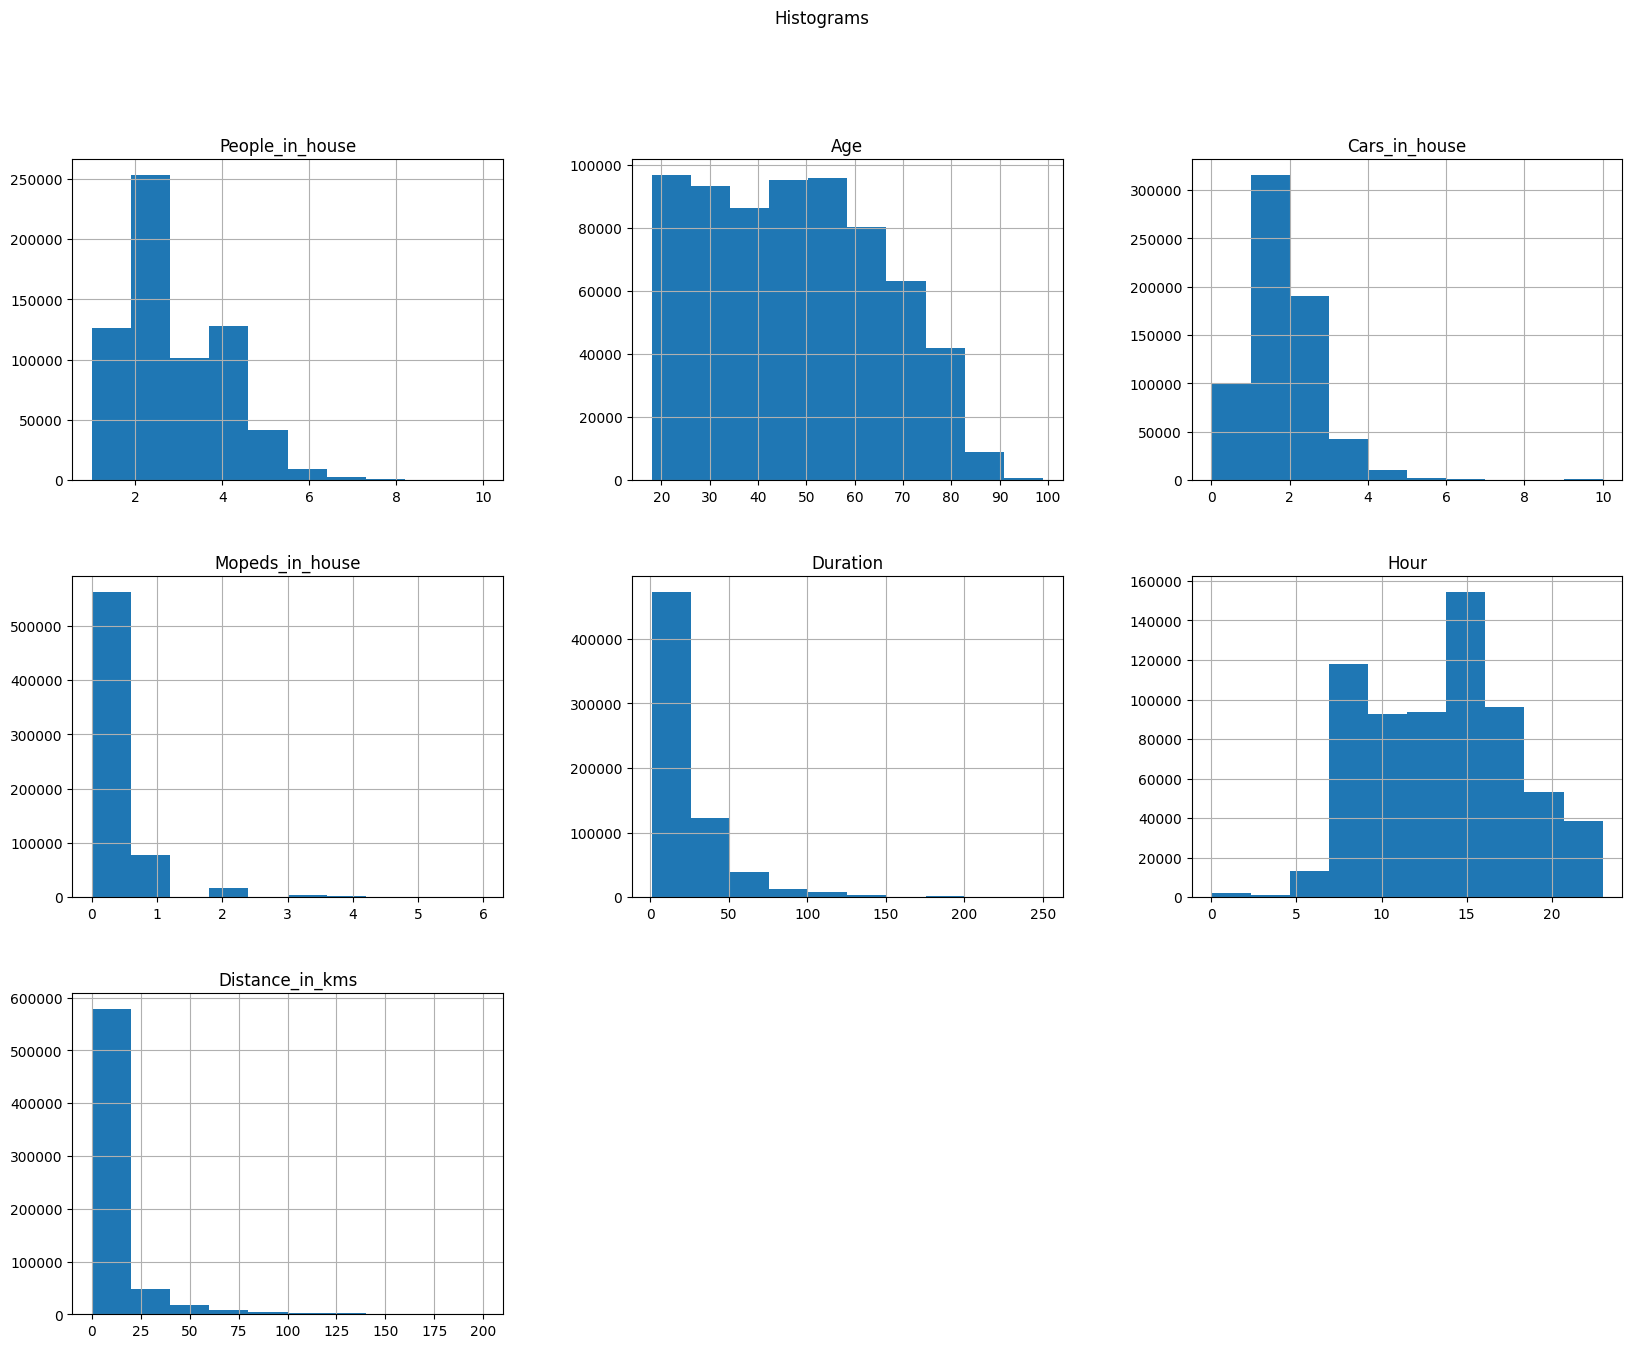

In [66]:
df.hist(bins=10, figsize=(20, 15))
plt.suptitle('Histograms') 
plt.show()

In [67]:
df.shape

(663268, 18)

In [68]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,663268.000000,663268.000000,663268.000000,663268.000000,663268.000000,663268.000000,663268.000000
mean,2.620345,47.500529,1.347995,0.199541,23.724719,13.638921,10.188347
std,1.294035,17.728599,0.984690,0.543181,26.703132,4.298749,19.580717
min,1.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,32.000000,1.000000,0.000000,10.000000,10.000000,1.200000
50%,2.000000,47.000000,1.000000,0.000000,15.000000,14.000000,3.300000
75%,4.000000,61.000000,2.000000,0.000000,30.000000,17.000000,10.000000
max,10.000000,99.000000,10.000000,6.000000,250.000000,23.000000,200.000000


In [69]:
df.duplicated().sum()

1

In [70]:
df = df.drop_duplicates()

# Explanatory Data Analysis

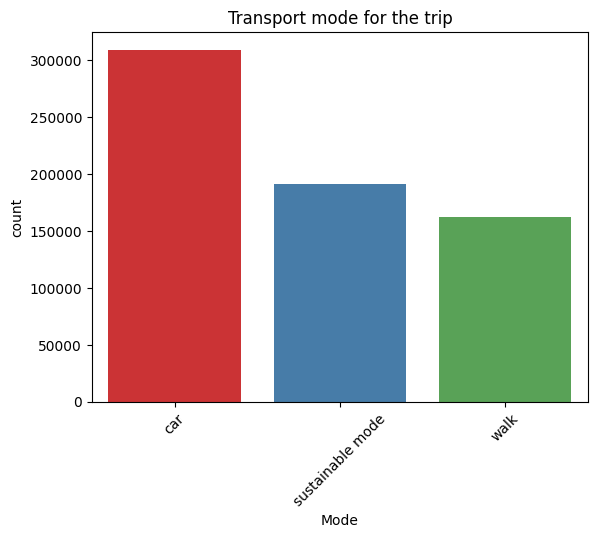

In [71]:
sns.countplot(x='Mode', data=df, palette='Set1')
plt.xticks(rotation=45)
plt.title('Transport mode for the trip')
plt.show()

In [72]:
perc=df['Mode'].value_counts(True)*100
print(perc)

Mode
car                 46.649992
sustainable mode    28.835899
walk                24.514110
Name: proportion, dtype: float64


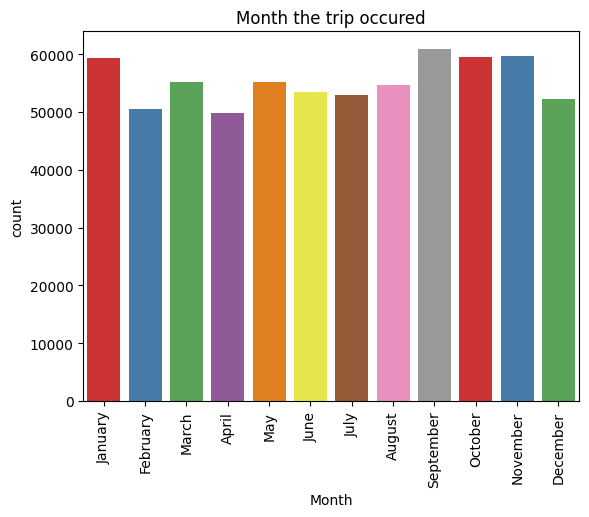

In [73]:
sns.countplot(x='Month', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.title('Month the trip occured')
plt.show()

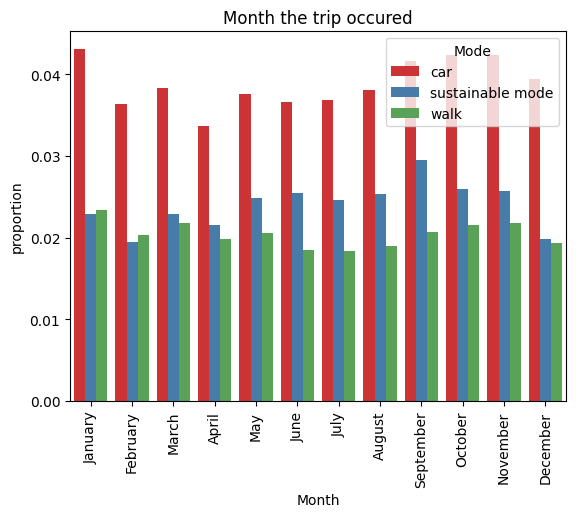

In [74]:
sns.countplot(x='Month', data=df, palette='Set1', hue='Mode', stat='proportion')
plt.xticks(rotation=90)
plt.title('Month the trip occured')
plt.show()

In [75]:
perc=df['Month'].value_counts(True)*100
print(perc)

Month
September    9.178355
November     8.998337
October      8.980848
January      8.940743
May          8.317616
March        8.310680
August       8.241025
June         8.052715
July         7.983663
December     7.874205
February     7.614882
April        7.506932
Name: proportion, dtype: float64


In [76]:
order_day = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

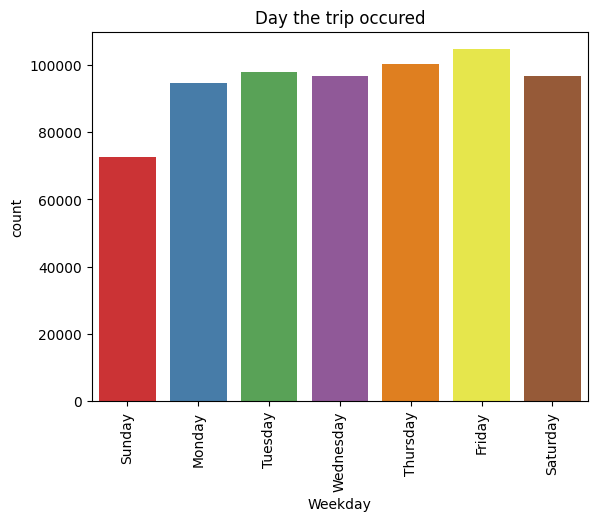

In [77]:
sns.countplot(x='Weekday', data=df, palette='Set1', order=order_day)
plt.xticks(rotation=90)
plt.title('Day the trip occured')
plt.show()

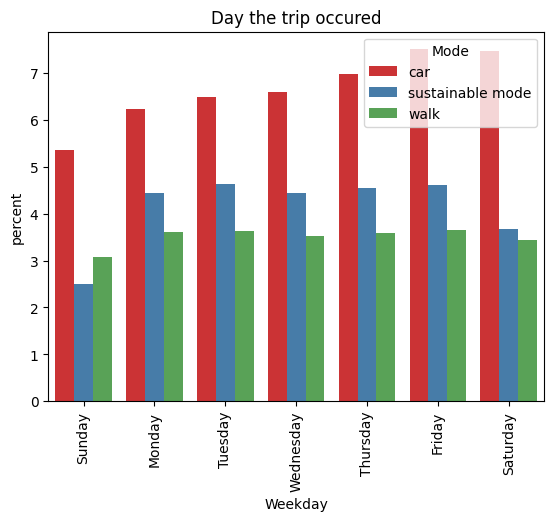

In [78]:
sns.countplot(x='Weekday', data=df, palette='Set1', hue='Mode', stat='percent', order=order_day)
plt.xticks(rotation=90)
plt.title('Day the trip occured')
plt.show()

In [79]:
perc=df['Weekday'].value_counts(True)*100
print(perc)

Weekday
Friday       15.777206
Thursday     15.121060
Tuesday      14.744892
Wednesday    14.577990
Saturday     14.575126
Monday       14.279619
Sunday       10.924107
Name: proportion, dtype: float64


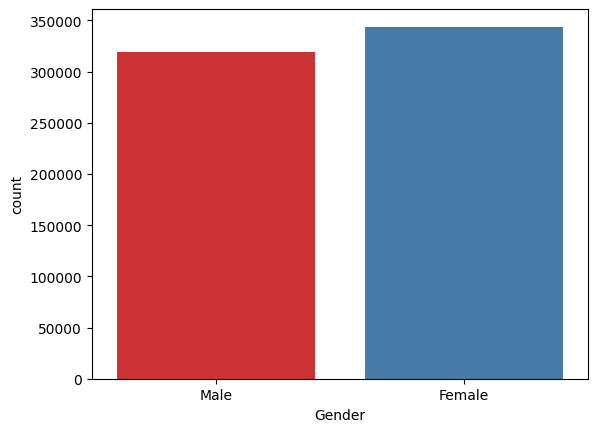

In [80]:
sns.countplot(x='Gender', data=df, palette='Set1')
plt.show()

In [81]:
perc=df['Gender'].value_counts(True)*100
print(perc)

Gender
Female    51.840812
Male      48.159188
Name: proportion, dtype: float64


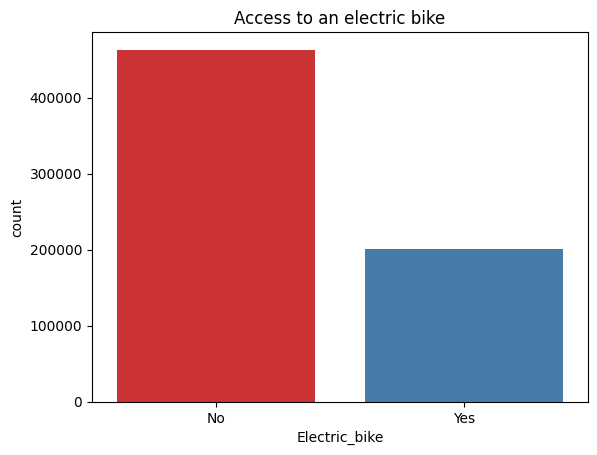

In [82]:
sns.countplot(x='Electric_bike', data=df, palette='Set1')
plt.title('Access to an electric bike')
plt.show()

In [83]:
perc=df['Electric_bike'].value_counts(True)*100
print(perc)

Electric_bike
No     69.819243
Yes    30.180757
Name: proportion, dtype: float64


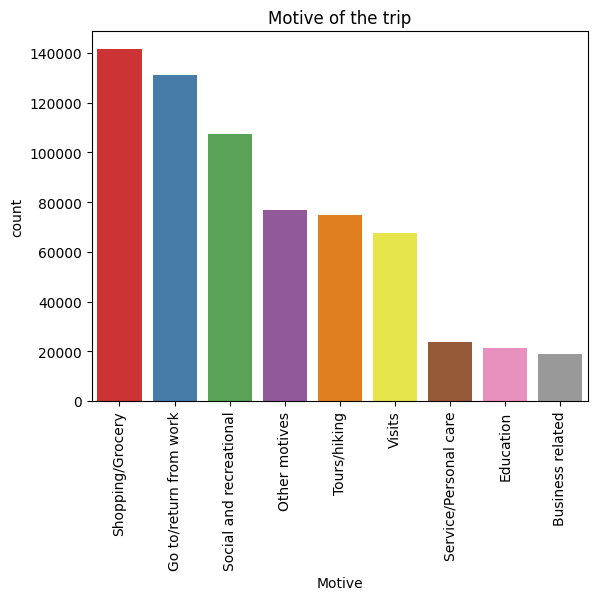

In [84]:
ordered_categories = df['Motive'].value_counts().index
sns.countplot(x='Motive', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Motive of the trip')
plt.show()

In [85]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery           21.344647
Go to/return from work     19.769716
Social and recreational    16.165285
Other motives              11.604678
Tours/hiking               11.305100
Visits                     10.206749
Service/Personal care       3.552566
Education                   3.200069
Business related            2.851190
Name: proportion, dtype: float64


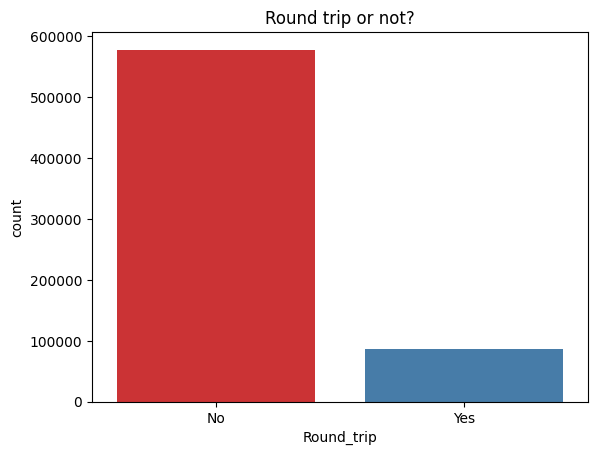

In [86]:
sns.countplot(x='Round_trip', data=df, palette='Set1')
plt.title('Round trip or not?')
plt.show()

In [87]:
perc=df['Round_trip'].value_counts(True)*100
print(perc)

Round_trip
No     87.105796
Yes    12.894204
Name: proportion, dtype: float64


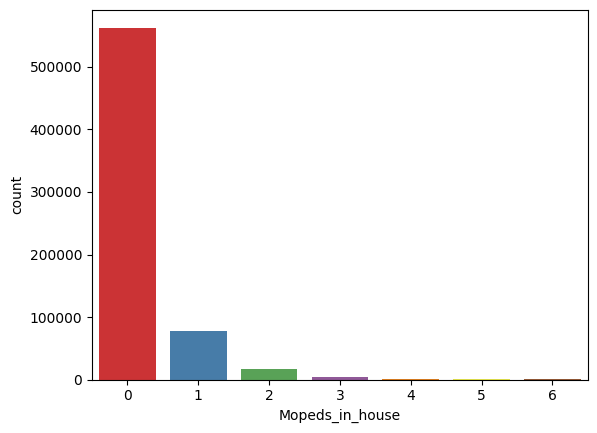

In [88]:
sns.countplot(x='Mopeds_in_house', data=df, palette='Set1')
plt.show()

In [89]:
perc=df['Mopeds_in_house'].value_counts(True)*100
print(perc)

Mopeds_in_house
0    84.863713
1    11.656090
2     2.577846
3     0.606242
4     0.193135
5     0.066791
6     0.036185
Name: proportion, dtype: float64


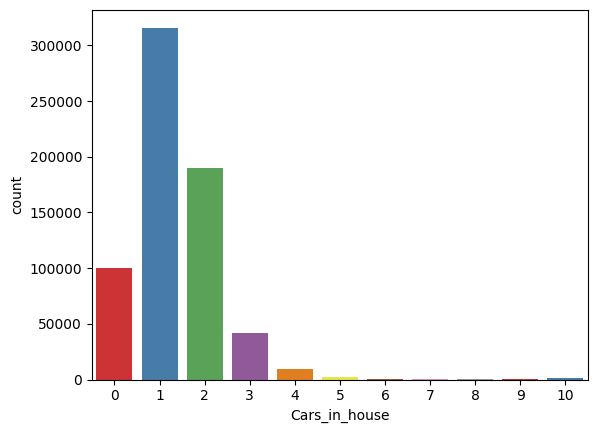

In [90]:
sns.countplot(x='Cars_in_house', data=df, palette='Set1')
plt.show()

In [91]:
perc=df['Cars_in_house'].value_counts(True)*100
print(perc)

Cars_in_house
1     47.628632
2     28.659499
0     15.147143
3      6.341036
4      1.498642
5      0.354759
10     0.172781
6      0.115187
7      0.040708
9      0.023821
8      0.017791
Name: proportion, dtype: float64


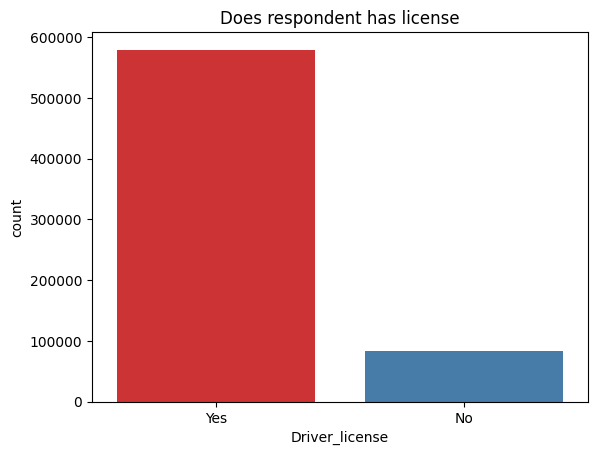

In [92]:
sns.countplot(x='Driver_license', data=df, palette='Set1')
plt.title('Does respondent has license')
plt.show()

In [93]:
perc=df['Driver_license'].value_counts(True)*100
print(perc)

Driver_license
Yes    87.331497
No     12.668503
Name: proportion, dtype: float64


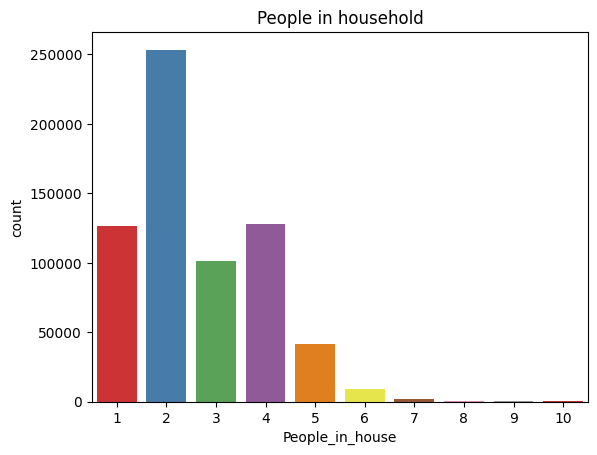

In [94]:
sns.countplot(x='People_in_house', data=df, palette='Set1')
plt.title('People in household')
plt.show()

In [95]:
perc=df['People_in_house'].value_counts(True)*100
print(perc)

People_in_house
2     38.221712
4     19.322234
1     19.037582
3     15.234890
5      6.286609
6      1.403809
7      0.331541
8      0.096492
9      0.039803
10     0.025329
Name: proportion, dtype: float64


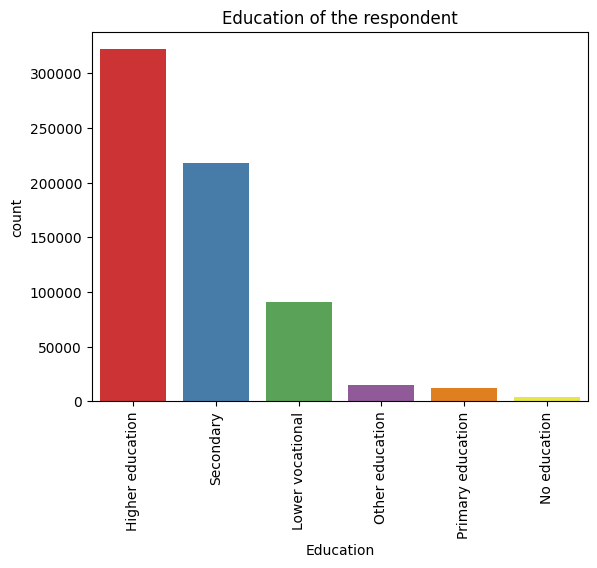

In [96]:
ordered_categories = df['Education'].value_counts().index
sns.countplot(x='Education', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Education of the respondent')
plt.show()

In [97]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education     48.527968
Secondary            32.915402
Lower vocational     13.766402
Other education       2.338726
Primary education     1.789475
No education          0.662026
Name: proportion, dtype: float64


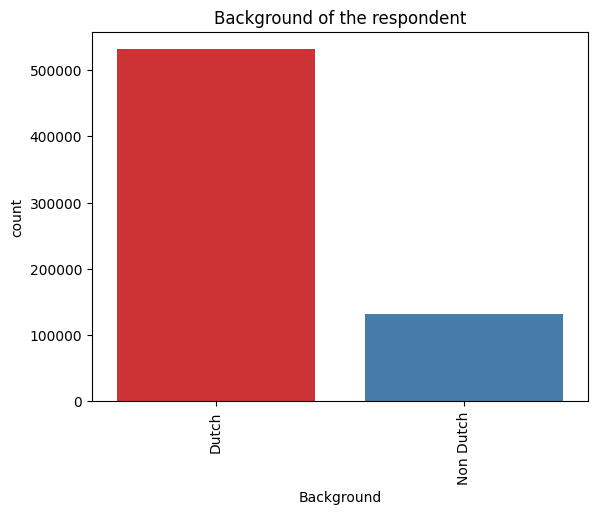

In [98]:
sns.countplot(x='Background', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.title('Background of the respondent')
plt.show()

In [99]:
perc=df['Background'].value_counts(True)*100
print(perc)

Background
Dutch        80.07846
Non Dutch    19.92154
Name: proportion, dtype: float64


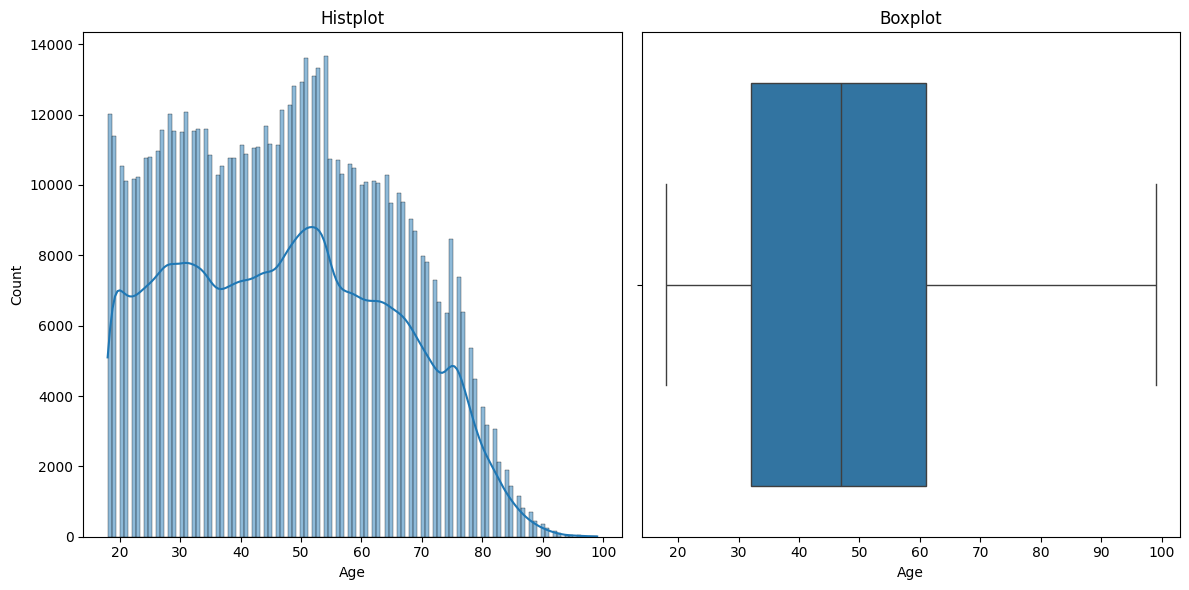

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Histplot')

sns.boxplot(x='Age', data=df, ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

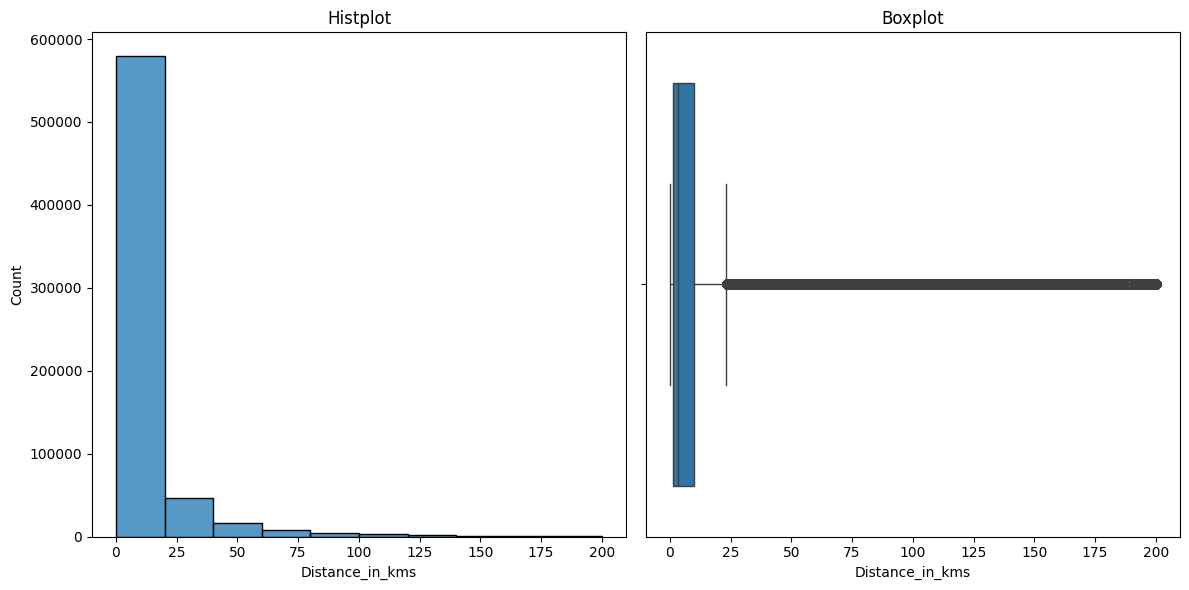

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(data=df, x='Distance_in_kms', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Distance_in_kms', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

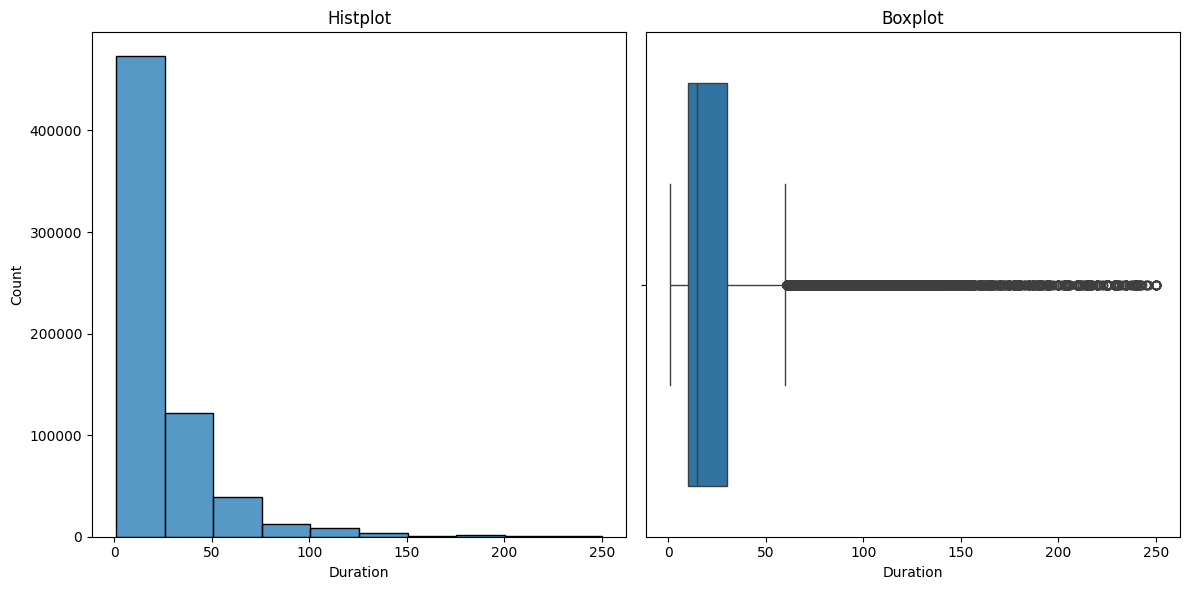

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Duration', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Duration', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

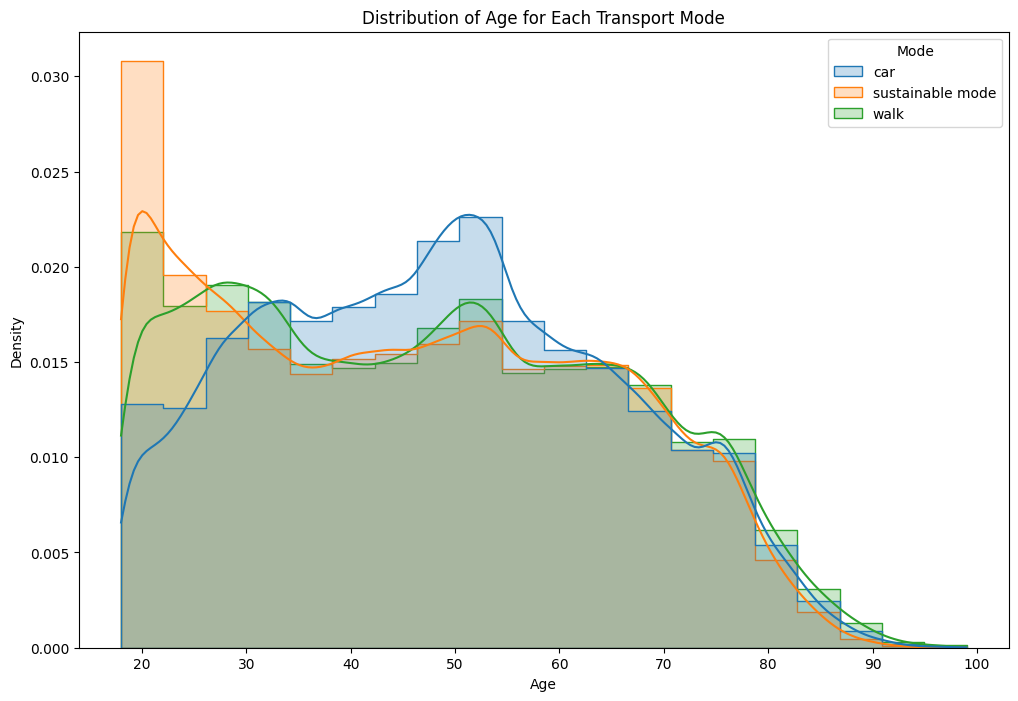

In [103]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Age', hue='Mode', bins=20, kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribution of Age for Each Transport Mode')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

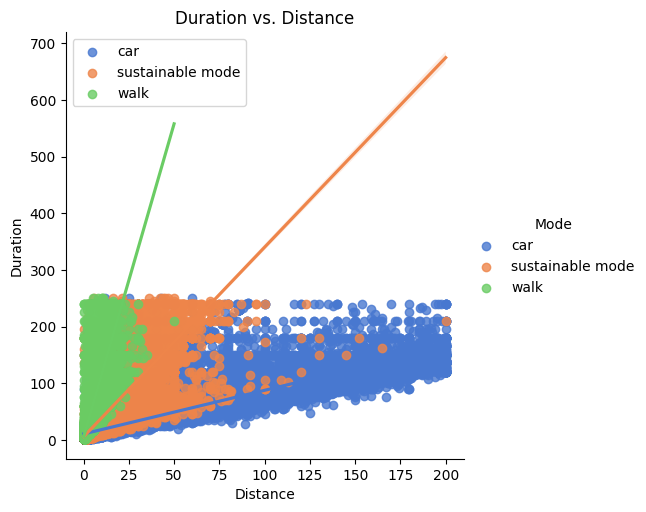

In [104]:
sns.lmplot(data=df, x='Distance_in_kms', y='Duration', hue='Mode', palette='muted')
plt.xlabel('Distance')
plt.ylabel('Duration')
plt.title('Duration vs. Distance')
plt.legend()
plt.show()

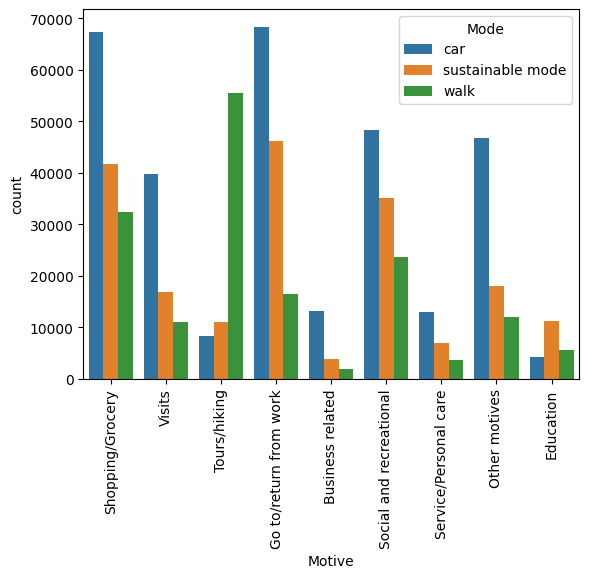

In [105]:
sns.countplot(x='Motive', data=df, hue="Mode")
plt.xticks(rotation=90)
plt.show()

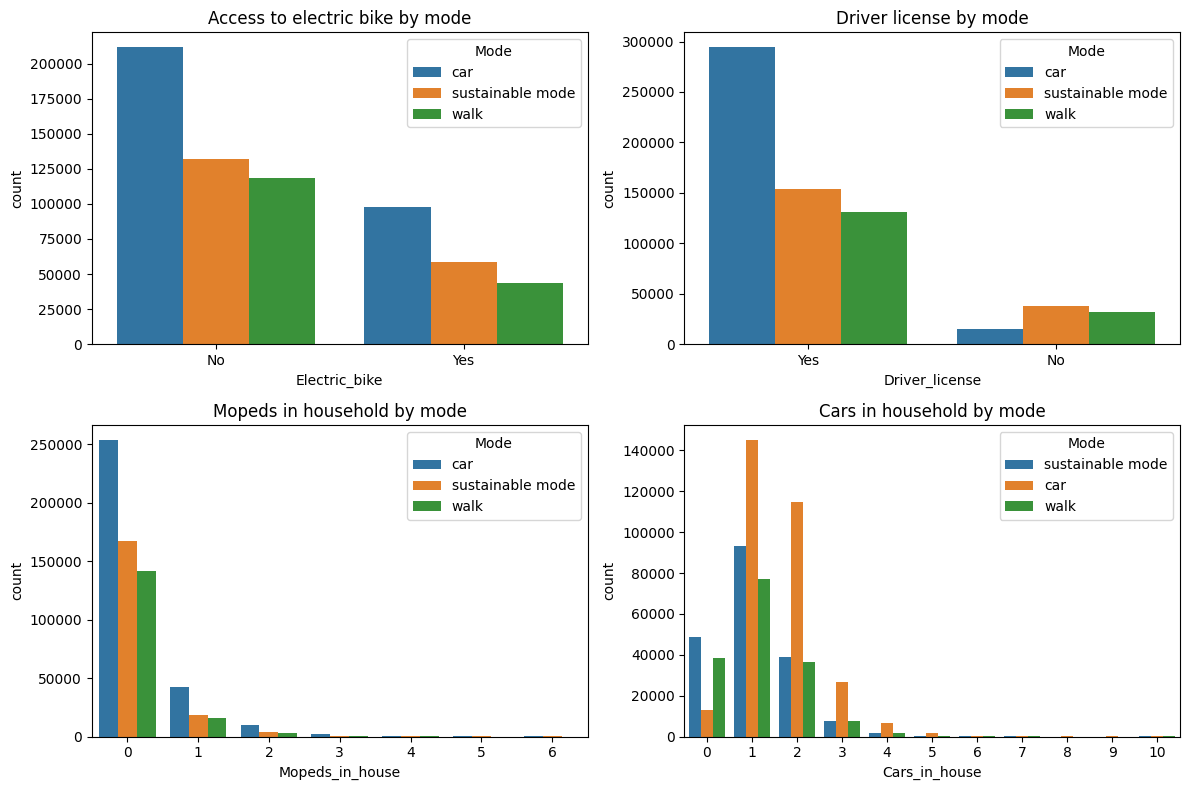

In [106]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

countplots = [
    (sns.countplot(x='Electric_bike', data=df, hue="Mode", ax=axes[0, 0]), 'Access to electric bike by mode'),
    (sns.countplot(x='Driver_license', data=df, hue="Mode", ax=axes[0, 1]), 'Driver license by mode'),
    (sns.countplot(x='Mopeds_in_house', data=df, hue="Mode", ax=axes[1, 0]), 'Mopeds in household by mode'),
    (sns.countplot(x='Cars_in_house', data=df, hue="Mode", ax=axes[1, 1]), 'Cars in household by mode')
]

for plot, title in countplots:
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=0)

plt.tight_layout()

plt.show()

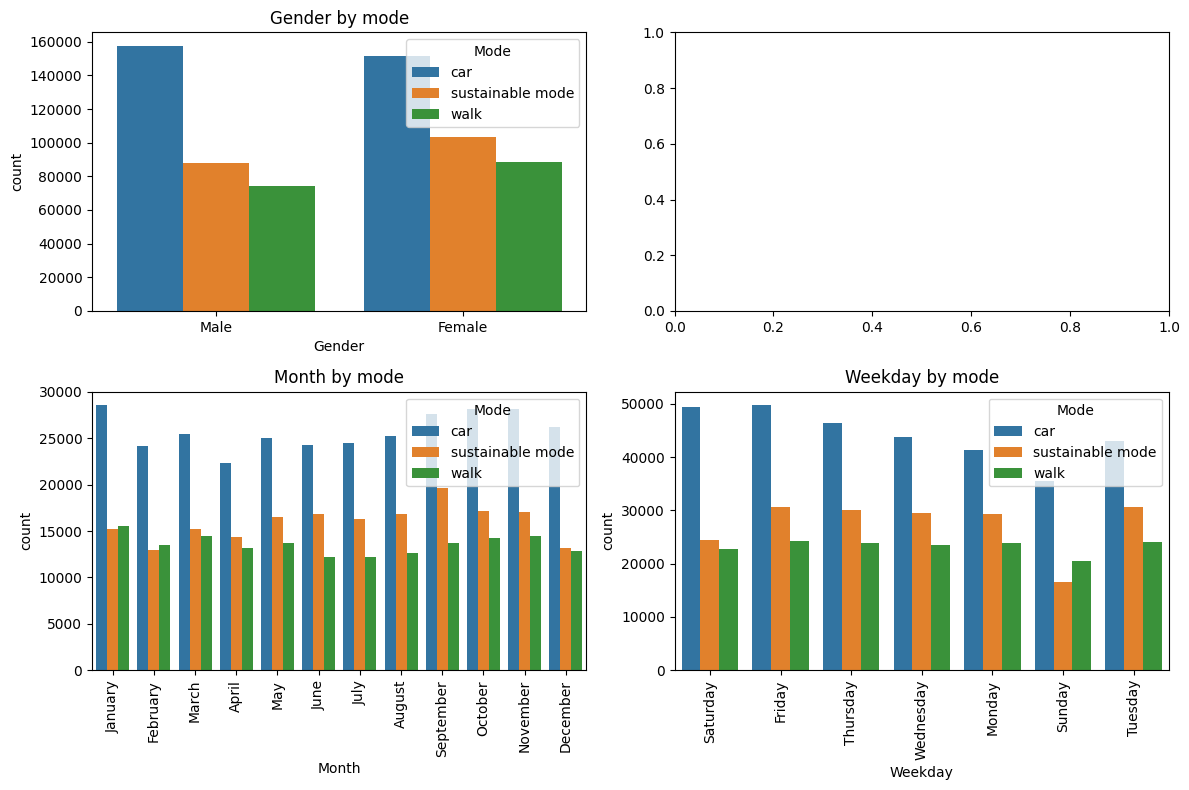

In [108]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

countplots = [
    (sns.countplot(x='Gender', data=df, hue="Mode", ax=axes[0, 0]), 'Gender by mode'),
    (sns.countplot(x='Month', data=df, hue="Mode", ax=axes[1, 0]), 'Month by mode'),
    (sns.countplot(x='Weekday', data=df, hue="Mode", ax=axes[1, 1]), 'Weekday by mode')
]

for plot, title in countplots:
    plot.set_title(title)
    if title in ['Month by mode', 'Weekday by mode']:
        plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()

# DATA PREPROCESS

In [109]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,663267.000000,663267.000000,663267.000000,663267.000000,663267.00000,663267.000000,663267.000000
mean,2.620347,47.500550,1.347997,0.199541,23.72475,13.638930,10.188362
std,1.294035,17.728605,0.984690,0.543181,26.70314,4.298747,19.580728
min,1.000000,18.000000,0.000000,0.000000,1.00000,0.000000,0.100000
25%,2.000000,32.000000,1.000000,0.000000,10.00000,10.000000,1.200000
50%,2.000000,47.000000,1.000000,0.000000,15.00000,14.000000,3.300000
75%,4.000000,61.000000,2.000000,0.000000,30.00000,17.000000,10.000000
max,10.000000,99.000000,10.000000,6.000000,250.00000,23.000000,200.000000


In [110]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education     48.527968
Secondary            32.915402
Lower vocational     13.766402
Other education       2.338726
Primary education     1.789475
No education          0.662026
Name: proportion, dtype: float64


In [111]:
value_mapping = {
                 "Other education":"Other",
                 "Primary education":"Other",
                 "No education":"Other"
                }
df['Education'] = df['Education'].replace(value_mapping)

In [112]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education    48.527968
Secondary           32.915402
Lower vocational    13.766402
Other                4.790228
Name: proportion, dtype: float64


In [113]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery           21.344647
Go to/return from work     19.769716
Social and recreational    16.165285
Other motives              11.604678
Tours/hiking               11.305100
Visits                     10.206749
Service/Personal care       3.552566
Education                   3.200069
Business related            2.851190
Name: proportion, dtype: float64


In [114]:
value_mapping = {
                 "Service/Personal care":"Service/Education/Business",
                 "Education":"Service/Education/Business",
                 "Business related":"Service/Education/Business",
                }
df['Motive'] = df['Motive'].replace(value_mapping)

In [115]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery              21.344647
Go to/return from work        19.769716
Social and recreational       16.165285
Other motives                 11.604678
Tours/hiking                  11.305100
Visits                        10.206749
Service/Education/Business     9.603825
Name: proportion, dtype: float64


In [116]:
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Duration,Hour,Mode,Distance_in_kms
0,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,15,10,car,6.0
1,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,10,11,car,6.0
2,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,5,15,sustainable mode,1.0
3,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,5,18,sustainable mode,1.0
4,2,Male,42,Dutch,Secondary,Yes,1,0,No,January,Friday,No,No,Shopping/Grocery,10,9,car,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Service/Education/Business,35,15,car,11.0
817122,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,7,16,walk,1.1
817123,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,5,17,walk,0.6
817124,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Social and recreational,15,18,car,6.3


In [117]:
value_mapping = {0: "22.00-01.00", 
                 1: "01.00-04.00",
                 2: "01.00-04.00",
                 3: "01.00-04.00",
                 4: "04.00-07.00",
                 5: "04.00-07.00",
                 6: "04.00-07.00",
                 7: "07.00-10.00",
                 8: "07.00-10.00",
                 9: "07.00-10.00",
                 10: "10.00-13.00",
                 11: "10.00-13.00",
                 12: "10.00-13.00",
                 13: "13.00-16.00",
                 14: "13.00-16.00",
                 15: "13.00-16.00",
                 16: "16.00-19.00",
                 17: "16.00-19.00",
                 18: "16.00-19.00",
                 19: "19.00-22.00",
                 20: "19.00-22.00",
                 21: "19.00-22.00",
                 22: "22.00-01.00",
                 23: "22.00-01.00"}
df['Hour'] = df['Hour'].replace(value_mapping)

In [118]:
perc=df['Hour'].value_counts(True)*100
print(perc)

Hour
16.00-19.00    22.800320
13.00-16.00    22.136033
10.00-13.00    20.970288
07.00-10.00    17.764188
19.00-22.00    10.349980
22.00-01.00     3.543068
04.00-07.00     2.114081
01.00-04.00     0.322042
Name: proportion, dtype: float64


In [119]:
df.duplicated().sum()

32005

In [120]:
df = df.drop_duplicates()
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Duration,Hour,Mode,Distance_in_kms
0,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,15,10.00-13.00,car,6.0
1,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,10,10.00-13.00,car,6.0
2,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,5,13.00-16.00,sustainable mode,1.0
3,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,5,16.00-19.00,sustainable mode,1.0
4,2,Male,42,Dutch,Secondary,Yes,1,0,No,January,Friday,No,No,Shopping/Grocery,10,07.00-10.00,car,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Service/Education/Business,35,13.00-16.00,car,11.0
817122,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,7,16.00-19.00,walk,1.1
817123,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,5,16.00-19.00,walk,0.6
817124,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Social and recreational,15,16.00-19.00,car,6.3


In [122]:
one_hot_encoded = pd.get_dummies(df['Motive'])
one_hot_encoded = one_hot_encoded.astype(int)
df = pd.concat([df, one_hot_encoded], axis=1)

In [123]:
le=LabelEncoder()
features=["Gender","Electric_bike", "Driver_license", "Round_trip", "Holiday", "Background"]
for col in features:
    df[col]=le.fit_transform(df[col])

In [124]:
value_mapping = {"car":0, "sustainable mode":1, "walk":2,}
df['Mode'] = df['Mode'].replace(value_mapping)

In [125]:
value_mapping = {"Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
df['Weekday'] = df['Weekday'].replace(value_mapping)

In [126]:
value_mapping = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}
df['Month'] = df['Month'].replace(value_mapping)

In [127]:
perc=df['Hour'].value_counts(True)*100
print(perc)

Hour
16.00-19.00    23.107521
13.00-16.00    21.861287
10.00-13.00    20.379969
07.00-10.00    18.229673
19.00-22.00    10.160916
22.00-01.00     3.708286
04.00-07.00     2.216354
01.00-04.00     0.335994
Name: proportion, dtype: float64


In [128]:
value_mapping = {"01.00-04.00":1, "04.00-07.00":2, "07.00-10.00":3, "10.00-13.00":4, "13.00-16.00":5, "16.00-19.00": 6, "19.00-22.00":7, "22.00-01.00":8}
df['Hour'] = df['Hour'].replace(value_mapping)

In [129]:
perc=df['Hour'].value_counts(True)*100
print(perc)

Hour
6    23.107521
5    21.861287
4    20.379969
3    18.229673
7    10.160916
8     3.708286
2     2.216354
1     0.335994
Name: proportion, dtype: float64


In [130]:
perc=df['Mode'].value_counts(True)*100
print(perc)

Mode
0    46.531709
1    28.716761
2    24.751529
Name: proportion, dtype: float64


In [131]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education    48.582047
Secondary           33.000561
Lower vocational    13.633959
Other                4.783434
Name: proportion, dtype: float64


In [132]:
value_mapping = {"Other":1, "Secondary":2, "Lower vocational":3, "Higher education":4}
df['Education'] = df['Education'].replace(value_mapping)

In [133]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
4    48.582047
2    33.000561
3    13.633959
1     4.783434
Name: proportion, dtype: float64


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 631262 entries, 0 to 817125
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   People_in_house             631262 non-null  int64  
 1   Gender                      631262 non-null  int32  
 2   Age                         631262 non-null  int64  
 3   Background                  631262 non-null  int32  
 4   Education                   631262 non-null  int64  
 5   Driver_license              631262 non-null  int32  
 6   Cars_in_house               631262 non-null  int64  
 7   Mopeds_in_house             631262 non-null  int64  
 8   Electric_bike               631262 non-null  int32  
 9   Month                       631262 non-null  int64  
 10  Weekday                     631262 non-null  int64  
 11  Holiday                     631262 non-null  int32  
 12  Round_trip                  631262 non-null  int32  
 13  Motive             

In [135]:
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,...,Hour,Mode,Distance_in_kms,Go to/return from work,Other motives,Service/Education/Business,Shopping/Grocery,Social and recreational,Tours/hiking,Visits
0,1,1,42,0,2,1,1,0,0,1,...,4,0,6.0,0,0,0,1,0,0,0
1,1,1,42,0,2,1,1,0,0,1,...,4,0,6.0,0,0,0,1,0,0,0
2,1,1,42,0,2,1,1,0,0,1,...,5,1,1.0,0,0,0,0,0,0,1
3,1,1,42,0,2,1,1,0,0,1,...,6,1,1.0,0,0,0,0,0,0,1
4,2,1,42,0,2,1,1,0,0,1,...,3,0,3.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,0,49,1,4,1,1,0,0,12,...,5,0,11.0,0,0,1,0,0,0,0
817122,3,0,49,1,4,1,1,0,0,12,...,6,2,1.1,0,0,0,1,0,0,0
817123,3,0,49,1,4,1,1,0,0,12,...,6,2,0.6,0,0,0,1,0,0,0
817124,3,0,49,1,4,1,1,0,0,12,...,6,0,6.3,0,0,0,0,1,0,0


In [136]:
df.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Month', 'Weekday', 'Holiday', 'Round_trip', 'Motive', 'Duration',
       'Hour', 'Mode', 'Distance_in_kms', 'Go to/return from work',
       'Other motives', 'Service/Education/Business', 'Shopping/Grocery',
       'Social and recreational', 'Tours/hiking', 'Visits'],
      dtype='object')

In [137]:
df.isnull().any()

People_in_house               False
Gender                        False
Age                           False
Background                    False
Education                     False
Driver_license                False
Cars_in_house                 False
Mopeds_in_house               False
Electric_bike                 False
Month                         False
Weekday                       False
Holiday                       False
Round_trip                    False
Motive                        False
Duration                      False
Hour                          False
Mode                          False
Distance_in_kms               False
Go to/return from work        False
Other motives                 False
Service/Education/Business    False
Shopping/Grocery              False
Social and recreational       False
Tours/hiking                  False
Visits                        False
dtype: bool

In [138]:
drops = ['Motive']
df = df.drop(drops, axis=1)
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,...,Hour,Mode,Distance_in_kms,Go to/return from work,Other motives,Service/Education/Business,Shopping/Grocery,Social and recreational,Tours/hiking,Visits
0,1,1,42,0,2,1,1,0,0,1,...,4,0,6.0,0,0,0,1,0,0,0
1,1,1,42,0,2,1,1,0,0,1,...,4,0,6.0,0,0,0,1,0,0,0
2,1,1,42,0,2,1,1,0,0,1,...,5,1,1.0,0,0,0,0,0,0,1
3,1,1,42,0,2,1,1,0,0,1,...,6,1,1.0,0,0,0,0,0,0,1
4,2,1,42,0,2,1,1,0,0,1,...,3,0,3.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,0,49,1,4,1,1,0,0,12,...,5,0,11.0,0,0,1,0,0,0,0
817122,3,0,49,1,4,1,1,0,0,12,...,6,2,1.1,0,0,0,1,0,0,0
817123,3,0,49,1,4,1,1,0,0,12,...,6,2,0.6,0,0,0,1,0,0,0
817124,3,0,49,1,4,1,1,0,0,12,...,6,0,6.3,0,0,0,0,1,0,0


In [139]:
df.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Month', 'Weekday', 'Holiday', 'Round_trip', 'Duration', 'Hour', 'Mode',
       'Distance_in_kms', 'Go to/return from work', 'Other motives',
       'Service/Education/Business', 'Shopping/Grocery',
       'Social and recreational', 'Tours/hiking', 'Visits'],
      dtype='object')

In [140]:
df = df.drop_duplicates()
df.shape

(631262, 24)

In [141]:
csv_filename = 'data2.csv'
df.to_csv(csv_filename, index=False)
zip_filename = 'data1.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    zipf.write(csv_filename)